problem statement : 
the many millions of teenage consumers using social networking sites have attracted the attention of marketers
struggling to find an edge in an increasingly competative market. one way to gain this eddge is to identify segments of teenager
so that clients can avoid targeting advertisments to teens with no interest in the product being sold
build k-means clusterings model to classify the interest of teenagers by using various attributes

In [1]:
import pandas as pd
df = pd.read_csv('snsdata.csv')
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [2]:
df.shape

(30000, 40)

In [3]:
df.size

1200000

In [4]:
df.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [5]:
df.gender.value_counts()

F    22054
M     5222
Name: gender, dtype: int64

In [6]:
df.age.describe()

count    24914.000000
mean        17.993950
std          7.858054
min          3.086000
25%         16.312000
50%         17.287000
75%         18.259000
max        106.927000
Name: age, dtype: float64

In [7]:
df.age.mode()

0    17.443
Name: age, dtype: float64

Mean = median = mode

In [8]:
df.gender = df.gender.fillna('F')
df.age = df.age.fillna(df.age.mean())
df.isnull().sum()

gradyear        0
gender          0
age             0
friends         0
basketball      0
football        0
soccer          0
softball        0
volleyball      0
swimming        0
cheerleading    0
baseball        0
tennis          0
sports          0
cute            0
sex             0
sexy            0
hot             0
kissed          0
dance           0
band            0
marching        0
music           0
rock            0
god             0
church          0
jesus           0
bible           0
hair            0
dress           0
blonde          0
mall            0
shopping        0
clothes         0
hollister       0
abercrombie     0
die             0
death           0
drunk           0
drugs           0
dtype: int64

In [9]:
df.gender.replace({'F': 1 , 'M':0},inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        30000 non-null  int64  
 2   age           30000 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

# Data Cleaning Done Now making Clusters Start

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)  # k = n_clusters assume k = 3
kmeans.fit(df)

KMeans(n_clusters=3)

if 3 clusters has been created each record should go to one of the cluster

In [11]:
kmeans.labels_  #0,1,2

array([1, 1, 0, ..., 1, 1, 1])

In [12]:
kmeans.cluster_centers_ # each points have 40 coordinates , 40 dimensional data

array([[2.00757605e+03, 8.53549600e-01, 1.79350145e+01, 5.73368594e+01,
        3.13704748e-01, 2.82087447e-01, 2.60695816e-01, 2.20733427e-01,
        1.77362482e-01, 1.55383169e-01, 1.24706159e-01, 1.19417019e-01,
        9.48519041e-02, 1.55500705e-01, 3.80112835e-01, 2.10037612e-01,
        1.53737659e-01, 1.42924307e-01, 1.11189469e-01, 4.96826516e-01,
        3.33333333e-01, 4.87776211e-02, 7.76680771e-01, 2.68335684e-01,
        5.37611660e-01, 3.06770099e-01, 1.39868359e-01, 2.28020686e-02,
        4.48401504e-01, 1.30230371e-01, 1.35637047e-01, 2.99952985e-01,
        4.23483780e-01, 1.61612600e-01, 9.07381288e-02, 6.55853315e-02,
        1.92054537e-01, 1.29877762e-01, 9.03855195e-02, 6.00611189e-02],
       [2.00745551e+03, 8.08768102e-01, 1.80332329e+01, 1.11776929e+01,
        2.40527673e-01, 2.37304106e-01, 2.05415592e-01, 1.29934537e-01,
        1.24380083e-01, 1.24231303e-01, 9.29875025e-02, 9.67070026e-02,
        8.34655822e-02, 1.33306884e-01, 2.88881174e-01, 2.07895

In [13]:
len(kmeans.cluster_centers_)

3

In [14]:
pd.DataFrame(kmeans.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2007.576046,0.853550,17.935015,57.336859,0.313705,0.282087,0.260696,0.220733,0.177362,0.155383,...,0.135637,0.299953,0.423484,0.161613,0.090738,0.065585,0.192055,0.129878,0.090386,0.060061
1,2007.455515,0.808768,18.033233,11.177693,0.240528,0.237304,0.205416,0.129935,0.124380,0.124231,...,0.080936,0.229072,0.313232,0.141391,0.056437,0.041609,0.179230,0.105783,0.084755,0.061149
2,2007.688253,0.909639,17.775056,144.710090,0.377259,0.289157,0.243223,0.254518,0.208584,0.154367,...,0.137048,0.414157,0.505271,0.172440,0.140060,0.103916,0.207078,0.142319,0.121235,0.051958


#### k was 3 but we dont know if k as 3 is the best value so lets find value of k(optimum value of k)

#### To find the value of k we have used elbow plot

In [15]:
kmeans.score(df) #ssd

-11298651.299693562

In [16]:
ssd = []
for k in range(1,11):
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    score = kmeans.score(df)
    ssd.append(score)

In [17]:
ssd

[-42274974.922834195,
 -18611355.303126708,
 -11293526.647981456,
 -8111437.013094601,
 -6334918.574256831,
 -5054397.6552840695,
 -3997693.817521312,
 -3101556.51816033,
 -2558619.503635419,
 -2221003.259788015]

In [18]:
import numpy as np
ssd = np.abs(ssd)
ssd = np.round(ssd)

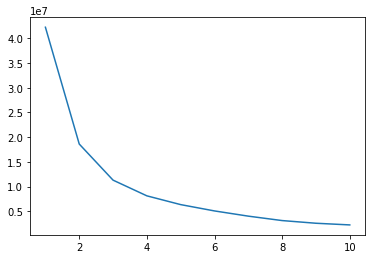

In [19]:
# Elbow plot
import matplotlib.pyplot as plt
cluster_values = list(range(1 , 11))
plt.plot(cluster_values , ssd)

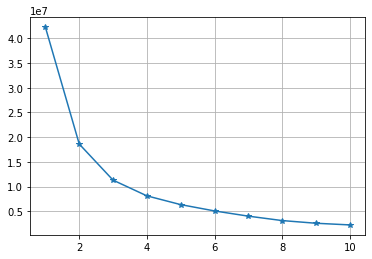

In [20]:
plt.plot(cluster_values , ssd , marker = '*')
plt.grid()

In [26]:
# Silhouette method
silhouette_avg = []
for k in range(1,11):
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    cluster_labels = kmeans.labels_
    sil_score = kmeans.score(df , cluster_labels)
    silhouette_avg.append(sil_score)
    

In [27]:
silhouette_avg

[-42274974.922834195,
 -18609121.028702103,
 -11294903.63787589,
 -8109247.118948551,
 -6331420.107963118,
 -5054984.517520746,
 -3976582.1978819584,
 -3109820.1176611073,
 -2556036.532421679,
 -2226016.325273371]

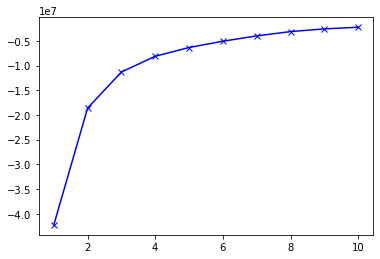

In [28]:
plt.plot(cluster_values , silhouette_avg , 'bx-')

In [29]:
# I choose the number of clusters by looking at the graph and observing the point where the SSD values starts decreasing. 
# Here the turning point in the graph is 5. So that's why I using 5 clusters.
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)
kmeans.cluster_centers_

array([[2.00751726e+03, 8.25159200e-01, 1.78865106e+01, 3.43503519e+01,
        2.91699251e-01, 2.68238186e-01, 2.45782594e-01, 1.79421294e-01,
        1.71712658e-01, 1.52496928e-01, 1.10267009e-01, 1.11384203e-01,
        9.39559826e-02, 1.56518825e-01, 3.45436264e-01, 2.24109038e-01,
        1.44006256e-01, 1.35962462e-01, 1.09261535e-01, 4.64529103e-01,
        3.38174506e-01, 4.68104122e-02, 8.01809854e-01, 2.63210814e-01,
        4.80728410e-01, 2.62093621e-01, 1.19874874e-01, 2.24555916e-02,
        4.36822701e-01, 1.21550665e-01, 1.20880349e-01, 2.64663166e-01,
        3.78170037e-01, 1.57412580e-01, 7.22824265e-02, 4.98268350e-02,
        1.94056530e-01, 1.28924143e-01, 8.84817339e-02, 5.68651547e-02],
       [2.00762254e+03, 8.67155291e-01, 1.79109902e+01, 7.07171324e+01,
        3.30279432e-01, 2.84928997e-01, 2.71873568e-01, 2.34997710e-01,
        1.78424187e-01, 1.54603756e-01, 1.39486945e-01, 1.28034814e-01,
        9.18460834e-02, 1.51626202e-01, 3.99221255e-01, 1.81859

In [30]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2007.517261,0.825159,17.886511,34.350352,0.291699,0.268238,0.245783,0.179421,0.171713,0.152497,...,0.120880,0.264663,0.378170,0.157413,0.072282,0.049827,0.194057,0.128924,0.088482,0.056865
1,2007.622538,0.867155,17.910990,70.717132,0.330279,0.284929,0.271874,0.234998,0.178424,0.154604,...,0.108108,0.321347,0.446862,0.171324,0.095282,0.076958,0.173614,0.122309,0.090472,0.058177
2,2007.437891,0.807346,18.102080,6.149596,0.225013,0.230167,0.193372,0.121216,0.110582,0.115997,...,0.080376,0.220968,0.298408,0.134916,0.055258,0.040123,0.178954,0.100992,0.083964,0.064001
3,2007.684932,0.910959,17.837679,261.164384,0.328767,0.287671,0.287671,0.212329,0.219178,0.219178,...,0.130137,0.287671,0.513699,0.212329,0.130137,0.157534,0.205479,0.136986,0.136986,0.061644
4,2007.694789,0.908189,17.736947,129.670802,0.388751,0.292804,0.239868,0.260546,0.207610,0.150538,...,0.134822,0.430108,0.500414,0.164599,0.138131,0.095120,0.210918,0.141439,0.119934,0.049628


In [31]:
centroids.columns = df.columns
centroids

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007.517261,0.825159,17.886511,34.350352,0.291699,0.268238,0.245783,0.179421,0.171713,0.152497,...,0.120880,0.264663,0.378170,0.157413,0.072282,0.049827,0.194057,0.128924,0.088482,0.056865
1,2007.622538,0.867155,17.910990,70.717132,0.330279,0.284929,0.271874,0.234998,0.178424,0.154604,...,0.108108,0.321347,0.446862,0.171324,0.095282,0.076958,0.173614,0.122309,0.090472,0.058177
2,2007.437891,0.807346,18.102080,6.149596,0.225013,0.230167,0.193372,0.121216,0.110582,0.115997,...,0.080376,0.220968,0.298408,0.134916,0.055258,0.040123,0.178954,0.100992,0.083964,0.064001
3,2007.684932,0.910959,17.837679,261.164384,0.328767,0.287671,0.287671,0.212329,0.219178,0.219178,...,0.130137,0.287671,0.513699,0.212329,0.130137,0.157534,0.205479,0.136986,0.136986,0.061644
4,2007.694789,0.908189,17.736947,129.670802,0.388751,0.292804,0.239868,0.260546,0.207610,0.150538,...,0.134822,0.430108,0.500414,0.164599,0.138131,0.095120,0.210918,0.141439,0.119934,0.049628


In [57]:
df['label'] = kmeans.labels_
df.head(20)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,label
0,2006,0,18.98200,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,2006,1,18.80100,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
2,2006,0,18.33500,69,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2006,1,18.87500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,2006,1,18.99500,10,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,2
5,2006,1,17.99395,142,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,4
6,2006,1,18.93000,72,0,0,0,0,0,0,...,2,0,0,2,0,0,0,0,0,1
7,2006,0,18.32200,17,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
8,2006,1,19.05500,52,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2006,1,18.70800,39,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
